In [1]:
%matplotlib inline
from preamble import *

In [2]:
! wget -nc http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -P data
! tar xzf data/aclImdb_v1.tar.gz --skip-old-files -C data

'wget' is not recognized as an internal or external command,
operable program or batch file.
tar: Option --skip-old-files is not supported
Usage:
  List:    tar -tf <archive-filename>
  Extract: tar -xf <archive-filename>
  Create:  tar -cf <archive-filename> [filenames...]
  Help:    tar --help


In [3]:
!tree -dL 2 data/aclImdb

Too many parameters - 2


In [4]:
!rm -r data/aclImdb/train/unsup

In [6]:
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")
# load_files returns a bunch, containing training texts and training labels
text_train, y_train = reviews_train.data, reviews_train.target
print("typ text_train: {}".format(type(text_train)))
print("długość text_train: {}".format(len(text_train)))
print("text_train[6]:\n{}".format(text_train[6]))

type of text_train: <class 'list'>
length of text_train: 75000
text_train[6]:
b'Gloomy Sunday - Ein Lied von Liebe und Tod directed by Rolf Sch\xc3\xbcbel in 1999 is a romantic, absorbing, beautiful, and heartbreaking movie. It started like Jules and Jim; it ended as one of Agatha Christie\'s books, and in between it said something about love, friendship, devotion, jealousy, war, Holocaust, dignity, and betrayal, and it did better than The Black Book which is much more popular. It is not perfect, and it made me, a cynic, wonder in the end on the complexity of the relationships and sensational revelations, and who is who to whom but the movie simply overwhelmed me. Perfect or not, it is unforgettable. All four actors as the parts of the tragic not even a triangle but a rectangle were terrific. I do believe that three men could fell deeply for one girl as beautiful and dignified as Ilona in a star-making performance by young Hungarian actress Erica Marozs\xc3\xa1n and who would not? The 

In [7]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [8]:
np.unique(y_train)

array([0, 1, 2])

In [9]:
print("Próbek na klasę (uczenie): {}".format(np.bincount(y_train)))

Próbek na klasę (uczenie): [12500 12500 50000]


In [10]:
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("Ilość dokumentów w danych testowych: {}".format(len(text_test)))
print("Próbek na klasę (test): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Number of documents in test data: 25000
Samples per class (test): [12500 12500]


![bag_of_words](images/bag_of_words.png)

#### Applying bag-of-words to a toy dataset

In [11]:
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [13]:
print("Rozmiar słownika: {}".format(len(vect.vocabulary_)))
print("Zawartość słownika:\n {}".format(vect.vocabulary_))

Vocabulary size: 13
Vocabulary content:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [14]:
bag_of_words = vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [18]:
print("Gęsta reprezentacja bag_of_words:\n{}".format(
    bag_of_words.toarray()))

Gęsta reprezentacja bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [19]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<75000x124255 sparse matrix of type '<class 'numpy.int64'>'
	with 10315542 stored elements in Compressed Sparse Row format>


In [20]:
feature_names = vect.get_feature_names()
print("Ilość cech: {}".format(len(feature_names)))
print("Pierwsze 20 cech:\n{}".format(feature_names[:20]))
print("Cechy od 20010 do 20030:\n{}".format(feature_names[20010:20030]))
print("Każda, co dwutysięczna cecha:\n{}".format(feature_names[::2000]))

Ilość cech: 124255
Pierwsze 20 cech:
['00', '000', '0000', '0000000000000000000000000000000001', '0000000000001', '000000001', '000000003', '00000001', '000001745', '00001', '0001', '00015', '0002', '0007', '00083', '000ft', '000s', '000th', '001', '002']
Cechy od 20010 do 20030:
['cheapen', 'cheapened', 'cheapening', 'cheapens', 'cheaper', 'cheapest', 'cheapie', 'cheapies', 'cheapjack', 'cheaply', 'cheapness', 'cheapo', 'cheapozoid', 'cheapquels', 'cheapskate', 'cheapskates', 'cheapy', 'chearator', 'cheat', 'cheata']
Każda, co dwutysięczna cecha:
['00', '_require_', 'aideed', 'announcement', 'asteroid', 'banquière', 'besieged', 'bollwood', 'btvs', 'carboni', 'chcialbym', 'clotheth', 'consecration', 'cringeful', 'deadness', 'devagan', 'doberman', 'duvall', 'endocrine', 'existent', 'fetiches', 'formatted', 'garard', 'godlie', 'gumshoe', 'heathen', 'honoré', 'immatured', 'interested', 'jewelry', 'kerchner', 'köln', 'leydon', 'lulu', 'mardjono', 'meistersinger', 'misspells', 'mumblecore',

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Średnia dokładność walidacji krzyżowej: {:.2f}".format(np.mean(scores)))

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Średnia dokładność walidacji krzyżowej: 0.67


c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Najlepszy wynik walidacji krzyżowej: {:.2f}".format(grid.best_score_))
print("Najlepsze parametry: ", grid.best_params_)

Best cross-validation score: 0.89
Best parameters:  {'C': 0.1}


In [18]:
X_test = vect.transform(text_test)
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.88


In [19]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train z min_df: {}".format(repr(X_train)))

X_train with min_df: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [22]:
feature_names = vect.get_feature_names()

print("Pierwsze 50 cech:\n{}".format(feature_names[:50]))
print("Cechy od 20010 do 20030:\n{}".format(feature_names[20010:20030]))
print("Każda, co siedemsetna cecha:\n{}".format(feature_names[::700]))

Pierwsze 50 cech:
['00', '000', '0000', '0000000000000000000000000000000001', '0000000000001', '000000001', '000000003', '00000001', '000001745', '00001', '0001', '00015', '0002', '0007', '00083', '000ft', '000s', '000th', '001', '002', '003', '003830', '004', '005', '006', '007', '0079', '008', '0080', '0083', '009', '0091042', '0093638', '00am', '00o', '00pm', '00s', '01', '015', '019', '01p', '01pm', '02', '020410', '022', '0267', '029', '03', '0312', '039']
Cechy od 20010 do 20030:
['cheapen', 'cheapened', 'cheapening', 'cheapens', 'cheaper', 'cheapest', 'cheapie', 'cheapies', 'cheapjack', 'cheaply', 'cheapness', 'cheapo', 'cheapozoid', 'cheapquels', 'cheapskate', 'cheapskates', 'cheapy', 'chearator', 'cheat', 'cheata']
Każda, co siedemsetna cecha:
['00', '1980s', '50m', 'aaaaah', 'aches', 'aeroflot', 'akeem', 'alpinists', 'anchoring', 'antrobus', 'archivist', 'ashida', 'aubuchon', 'baaaaah', 'balu', 'basinger', 'beermat', 'bernhard', 'bindingly', 'blinked', 'bollwood', 'bourn', 'b

In [21]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Najlepszy wynik walidacji krzyżowej: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.89


In [25]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Liczba słów pomijalnych: {}".format(len(ENGLISH_STOP_WORDS)))
print("Co dziesiąte słowo pomijalne:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Liczba słów pomijalnych: 318
Co dziesiąte słowo pomijalne:
['someone', 'as', 'my', 'him', 'further', 'formerly', 'ltd', 'see', 'put', 'other', 'are', 'own', 'at', 'over', 'hundred', 'and', 'same', 'enough', 'twelve', 'latter', 'few', 'your', 'else', 'please', 'due', 'former', 'neither', 'with', 'moreover', 'seeming', 'eleven', 'may']


In [26]:
# Specifying stop_words="english" uses the built-in list.
# We could also augment it and pass our own.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("X_train ze słowami pomijalnymi:\n{}".format(repr(X_train)))

X_train ze słowami pomijalnymi:
<75000x44223 sparse matrix of type '<class 'numpy.int64'>'
	with 6577418 stored elements in Compressed Sparse Row format>


In [27]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Najlepszy wynik walidacji krzyżowej: {:.2f}".format(grid.best_score_))

NameError: name 'GridSearchCV' is not defined

### Skalowanie danych z tf–idf
\begin{equation*}
\text{tfidf}(w, d) = \text{tf} \log\big(\frac{N + 1}{N_w + 1}\big) + 1
\end{equation*}

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                     LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Najlepszy wynik walidacji krzyżowej: {:.2f}".format(grid.best_score_))

NameError: name 'GridSearchCV' is not defined

In [ ]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset:
X_train = vectorizer.transform(text_train)
# find maximum value for each of the features over dataset:
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())

print("Cechy z najniższym tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Cechy z najwyższym tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

In [ ]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Cechy z najniższym idf:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

#### Investigating model coefficients

In [28]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,
    feature_names, n_top_features=40)

NameError: name 'grid' is not defined

#### Bag of words with more than one word (n-grams)

In [29]:
print("bards_words:\n{}".format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [30]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("Rozmiar słownika: {}".format(len(cv.vocabulary_)))
print("Słownik:\n{}".format(cv.get_feature_names()))

Vocabulary size: 13
Vocabulary:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [31]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("Rozmiar słownika: {}".format(len(cv.vocabulary_)))
print("Słownik:\n{}".format(cv.get_feature_names()))

Vocabulary size: 14
Vocabulary:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [32]:
print("Dane po transformacji (gęste):\n{}".format(cv.transform(bards_words).toarray()))

Transformed data (dense):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [33]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("Rozmiar słownika: {}".format(len(cv.vocabulary_)))
print("Słownik:\n{}".format(cv.get_feature_names()))

Vocabulary size: 39
Vocabulary:['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']



In [34]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
# uruchomienie wyszukiwania siatki zajmuje dużo czasu ze względu
# na stosunkowo dużą siatkę i włączenie trygramów
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Najlepszy wynik walidacji krzyżowej: {:.2f}".format(grid.best_score_))
print("Najlepsze parametry:\n{}".format(grid.best_params_))

Best cross-validation score: 0.91
Best parameters:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


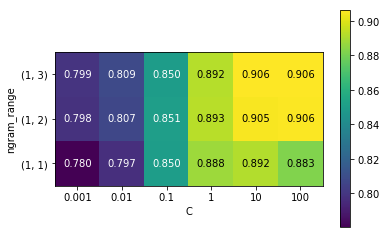

In [35]:
# wyodrębnij wyniki z funkcji grid_search
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# wyświetl mapę termiczną
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

(-22, 22)

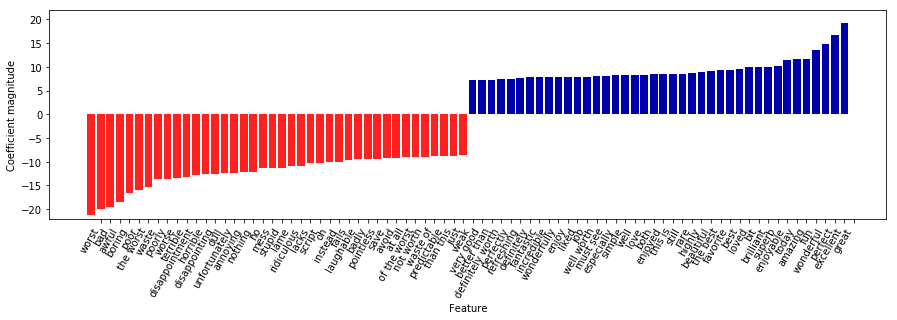

In [36]:
# wyodrębnij nazwy cech i współczynnikis['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)
plt.ylim(-22, 22)

(-22, 22)

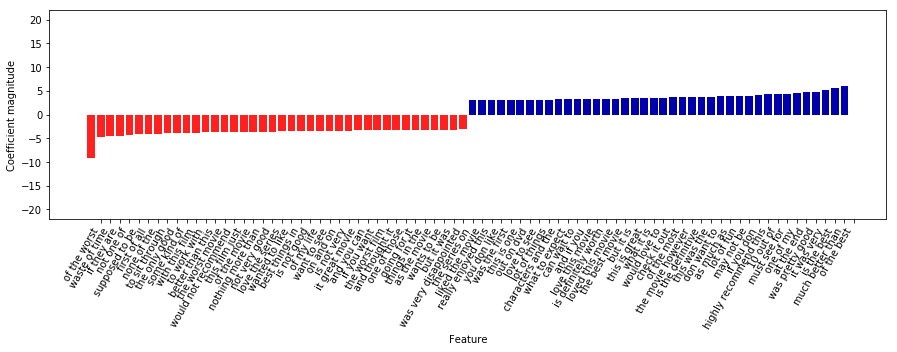

In [37]:
# znajdź 3-gramowe elementy
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# wyświetl tylko elementy 3-gramowe
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=40)

plt.ylim(-22, 22)

#### Advanced tokenization, stemming and lemmatization

In [39]:
import spacy
import nltk

# załaduj anglojęzyczne modele spacy
en_nlp = spacy.load('en')
# stwórz instancję algorytmu Portera nltk
instantiate nltk's Porter stemmer
stemmer = nltk.stem.PorterStemmer()

# zdefiniuj funkcję do porównania lematyzacji z biblioteki spacy ze stemmingiem z nltk
def compare_normalization(doc):
    # tokenizuj dokument w spacy
    doc_spacy = en_nlp(doc)
    # wyświetl lematy znalezione przez spacy
    print("Lemmatyzacja:")
    print([token.lemma_ for token in doc_spacy])
    # wyświetl tokeny znalezione przez algorytm Portera
    print("Stemming:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [40]:
compare_normalization(u"Our meeting today was worse than yesterday, "
                       "I'm scared of meeting the clients tomorrow.")

Lemmatization:
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'i', 'be', 'scar', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', "'m", 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [41]:
# Informacje techniczne: chcemy używać tokenizera opartego na wyrażeniach regularnych,
# który jest używany przez klasę CountVectorizer i używać tylko lematyzacji
# z biblioteki spacy. W tym celu zastąpiliśmy metodę en_nlp.tokenizer (ze spacy)
# tokenizacją opartą na wyrażeniach regularnych. 

import re
# w klasie CountVectorizer używane są wyrażenia regularne
regexp = re.compile('(?u)\\b\\w\\w+\\b')
# załaduj model językowy spacy i zapisz stary tokenizer
en_nlp = spacy.load('en', disable=['parser', 'ner'])
old_tokenizer = en_nlp.tokenizer
# zamień tokenizer na poprzednie wyrażenie regularne
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(regexp.findall(string))

# utwórz niestandardowy tokenizer przy użyciu potoku przetwarzania dokumentów spacy
# (teraz używamy własnego tokenizera)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

# zdefiniuj wektoryzator zliczania z niestandardowym tokenizatorem
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

In [42]:
# przekształcić tekst_train za pomocą klasy CountVectorizer z lematyzacją
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape: {}".format(X_train_lemma.shape))
# standardowa instancja klasy CountVectorizer dla porównania
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape: {}".format(X_train.shape))


X_train_lemma.shape: (25000, 21637)
X_train.shape: (25000, 27271)


In [43]:
# zbuduj przeszukiwanie siatki, używając tylko 1% danych jako zestawu uczącego
from sklearn.model_selection import StratifiedShuffleSplit
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_iter=5, test_size=0.99, train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv)
# wykonaj przeszukiwanie siatki za pomocą standardowej instancji CountVectorizer
grid.fit(X_train, y_train)
print("Najlepszy wynik walidacji krzyżowej (standardowy CountVectorizer): {:.3f}".format(grid.best_score_))
# wykonaj przeszukiwanie siatki z lemmatyzacją
grid.fit(X_train_lemma, y_train)
print("Najlepszy wynik walidacji krzyżowej (standardowy ): {:.3f}".format(grid.best_score_))


Best cross-validation score (standard CountVectorizer): 0.721
Best cross-validation score (lemmatization): 0.731


In [44]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [42]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics=10, learning_method="batch",
                                max_iter=25, random_state=0)
# Budujemy model i przekształcamy dane w jednym kroku.
# Obliczanie transformacji zajmuje trochę czasu, 
# możemy zaoszczędzić czas, robiąc dwie rzeczy naraz

document_topics = lda.fit_transform(X)

In [43]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 10000)


In [47]:
# Dla każdego tematu (wiersz w atrybucie components_), posortuj cechy (rosnąco)
# Aby posortować cechy malejąco, odwróć wiersze za pomocą [:, :: - 1]
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# Pobierz nazwy cech z wektoryzatora
feature_names = np.array(vect.get_feature_names())


In [48]:
# Wyświetl 10 tematów:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
family        world         comedy        series        saw           
young         us            guy           episode       thought       
real          american      laugh         tv            am            
us            our           jokes         episodes      thing         
director      documentary   fun           shows         got           
work          history       humor         season        10            
both          years         re            new           want          
beautiful     new           hilarious     years         going         
each          human         doesn         television    watched       


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
acti

In [49]:
lda100 = LatentDirichletAllocation(n_topics=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [50]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])

In [51]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     
suspense      awful         hitler        gets          young         
horror        boring        nazi          guy           old           
atmosphere    horrible      midnight      around        romantic      
mystery       stupid        joe           down          between       
house         thing         germany       kill          romance       
director      terrible      years         goes          wonderful     
quite         script        history       killed        heart         
bit           nothing       new           going         feel          
de            worse         modesty       house         year          
performances  waste         cowboy        away          each          
dark          pretty        jewish        head          french        
twist 

In [52]:
# sort by weight of "music" topic 45
music = np.argsort(document_topics100[:, 45])[::-1]
# print the five documents where the topic is most important
for i in music[:10]:
    # show first two sentences
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that H

NameError: name 'sorting' is not defined

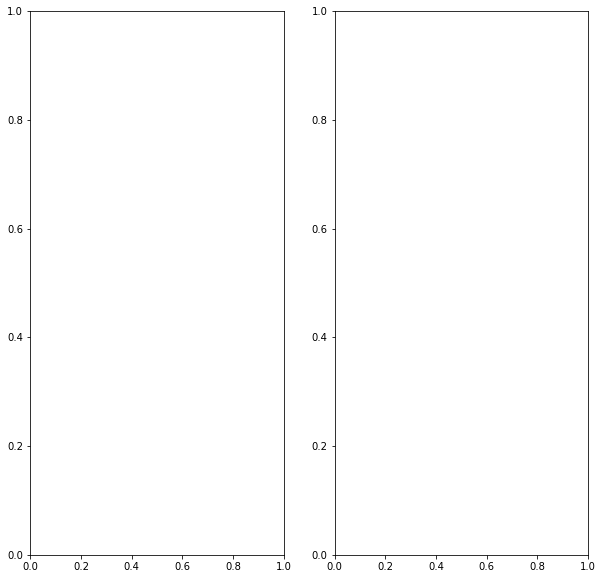

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# wykres z dwoma kolumnami:
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()